<a href="https://colab.research.google.com/github/kakdevedant2018/PML/blob/main/DGA_detection_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import nltk

In [2]:
df = pd.read_csv("/content/drive/MyDrive/DGA_data/dga_data.csv")

In [3]:
#Null values drop
df = df.dropna()

In [4]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
df

,isDGA,domain,host,subclass
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,gameoverdga
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,cryptolocker
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,cryptolocker
3,dga,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,newgoz
4,dga,jpqftymiuver,jpqftymiuver.ru,cryptolocker
...,...,...,...,...
159995,legit,manhunt,manhunt.net,alexa
159996,legit,yupptv,yupptv.com,alexa
159997,legit,bbcmundo,bbcmundo.com,legit
159998,legit,kanogames,kanogames.com,legit


In [6]:
#Removing unnecessary columns.
df=df.drop(["subclass"],axis=1)

In [7]:
df

,isDGA,domain,host
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru
3,dga,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net
4,dga,jpqftymiuver,jpqftymiuver.ru
...,...,...,...
159995,legit,manhunt,manhunt.net
159996,legit,yupptv,yupptv.com
159997,legit,bbcmundo,bbcmundo.com
159998,legit,kanogames,kanogames.com


# Feature Generation
used to extract the features.

The linguistic features are 



# Number of characters.

In [9]:
df["num_characters"]=df["host"].apply(len)

In [10]:
df.head(3)

,isDGA,domain,host,num_characters
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,17


# Vowel count

In [11]:
df['Vowels'] = df.host.str.lower().str.count(r'[aeiou]')

In [12]:
df.head(3)

,isDGA,domain,host,num_characters,Vowels
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30,4
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17,1
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,17,4


# Number of consonant

In [13]:
df['Consonant'] = df.host.str.lower().str.count(r'[a-z]') - df['Vowels']

In [14]:
df.head(3)

,isDGA,domain,host,num_characters,Vowels,Consonant
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17,1,15
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,17,4,12


#  Unique character rate.
It is the measure of unique characters and if lower unique character rate implies a DGA domain.


In [15]:
# df["Unique Character rate"] = len(set(df["host"]))/df["host"].str.len()

In [16]:
s = "vedant"
print(len(set(s))/len(s))

1.0


In [17]:
len(set(df["domain"]))

159998

In [18]:
# created the list of domain unique character length.
l=[]
for i in df["domain"]:
  l.append(len(set(i)))

In [19]:
l[0]

21

In [20]:
l1=[]
for i in df["domain"]:
  l1.append(len(i))

In [21]:
# taking unique character ratio.
k=[]
for i in range(159998 ):
  j=l[i]/l1[i]
  k.append(j)
df["Unique characters ratio"]=k

In [22]:
df.head(3)

,isDGA,domain,host,num_characters,Vowels,Consonant,Unique characters ratio
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16,0.807692
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17,1,15,0.714286
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,17,4,12,0.714286


# Percentage of numerical characters:


In [23]:
domain =[]

In [24]:
for i in df["domain"]:
  domain.append(i)

In [25]:
alpha=[]
numeric=[]
for i in domain:
  c_alpha=0
  c_digit=0
  for j in i:
    if j.isdigit():
      c_digit+=1
    else:
      c_alpha+=1
  alpha.append(c_alpha)
  numeric.append(c_digit)
  ans =alpha[0]/(alpha[0]+numeric[0])
  
  #res.append[int(i) for i  in   if i.isdigit()]


In [26]:
per_n_c=[]
for i in range(len(alpha)):
  per_n_c.append(alpha[i]/(alpha[i]+numeric[i]))


In [27]:
df["percentage of numeric characters"]=per_n_c

In [28]:
df.head(3)

,isDGA,domain,host,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16,0.807692,0.653846
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17,1,15,0.714286,1.000000
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,17,4,12,0.714286,1.000000


#  Entropy 
### It is the measure of randomness that is DGA domain has higher uncertainity than of normal domain.
## In DGA there is no meaningful pattern.

In [29]:
from collections import Counter
from math import log
def shannon(string):
  counts = Counter(string)
  frequencies = ((i / len(string)) for i in counts.values())
  return - sum(f * log(f, 2) for f in frequencies)
#s = lambda i : - sum(f * log(f, 2) for f in ((j / len(i)) for j in Counter(i).values()))



In [30]:
s_list=[]
for i in df["host"]:
  s_list.append(shannon(i))
df["Shannon_Entropy"]=s_list

In [31]:
df.head(3)

,isDGA,domain,host,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters,Shannon_Entropy
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16,0.807692,0.653846,4.440224
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17,1,15,0.714286,1.000000,3.616875
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,17,4,12,0.714286,1.000000,3.572469



# N-Gram Feature
If a domain is legit it is more likely to exists in the Alexa ranking list
Thus it is necessary to find the similarity of legit domains.
we build a legit text corpus.


# Dictionary matching

“How much of the string can be explained by a dictionary?"

Therfore, I created the function ------- in the DGA package to return the percentage of characters that are in the dictionary.

# similarity with legit domain.

In [32]:
df= df.sample(frac=1)

In [33]:
df_demo = df.head(100)

In [ ]:
df_demo

In [34]:
list1 = []
for index, rows in df.iterrows():
  if rows["isDGA"]== "legit":
    list1.append(rows["domain"])

In [39]:
list1[0:10]

['newhouse',
 'flocktory',
 'check',
 'cetizen',
 'perfectbrideguide',
 'whmcs',
 'mobcustom',
 'vegalab',
 'informtarget',
 'jollychic']

In [40]:
# code for creating n grams from domain.
from nltk import ngrams
d_3gram=[]
for i in list1:
  l1 = list(ngrams(str(i),3))
  for i in l1: 
    sub=[]
    for j in i:
      sub.append(j)
    
    d_3gram.append("".join(sub))

print(len(d_3gram))

617727


In [41]:
from nltk import ngrams
d_4gram=[]
for i in list1:
  l1 = list(ngrams(str(i),4))
  for i in l1: 
    sub=[]
    for j in i:
      sub.append(j)
    
    d_4gram.append("".join(sub))

print(len(d_4gram))

538185


In [42]:
# code for creating n grams from domain.
from nltk import ngrams
d_5gram=[]
for i in list1:
  l1 = list(ngrams(str(i),5))
  for i in l1: 
    sub=[]
    for j in i:
      sub.append(j)
    
    d_5gram.append("".join(sub))

print(len(d_5gram))

460524


In [43]:
from nltk.util import ngrams

def jaccard_similarity(str1, d, n):
  str1_bigrams=[]
  l1 = list(ngrams(str1,n))
  for i in l1: 
    sub=[]
    for j in i:
      sub.append(j)
    
    str1_bigrams.append("".join(sub))
  intersection = len(list(set(str1_bigrams).intersection(set(d))))
  union = (len(set(str1_bigrams)) + len(set(d))) - intersection

  return float(intersection) / union

In [ ]:
grams = []
import math
for i in df["domain"]:
  similarities = [jaccard_similarity(str(i), d_3gram, 3)]
  avg_similarity= sum(similarities) / len(similarities)
  grams.append(avg_similarity)
  
df["3_grams"] = grams


In [ ]:
grams = []
import math
for i in df["domain"]:
  similarities = [jaccard_similarity(str(i), d_4gram, 4)]
  avg_similarity= sum(similarities) / len(similarities)
  grams.append(avg_similarity)
  
df["4_grams"] = grams

In [ ]:
grams = []
import math
for i in df["domain"]:
  similarities = [jaccard_similarity(str(i), d_5gram, 5)]
  avg_similarity= sum(similarities) / len(similarities)
  grams.append(avg_similarity)
  
df["5_grams"] = grams

In [ ]:
df.to_csv("Dataframe_ngrams.csv")

In [ ]:
df_demo

In [ ]:
df.to_csv("/content/drive/MyDrive/DGA_data/Dataframe_ngrams.csv")

#number of dot counts


In [44]:
df['ndots']=df['domain'].str.count("\.")

In [45]:
df[df["ndots"]!=0]

,isDGA,domain,host,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters,Shannon_Entropy,ndots


# Number of Consecutive Vowels

In [46]:
def count_vowels(word):
    vowel_count = 0

    current = 0;
    sequence = 1;
    while sequence < (len(word)):
        if (word[current] == 'a' or word[current] == 'e' or word[current] == 'i' or word[current] == 'o' or word[current] == 'u') \
                and (word[sequence] == 'a' or word[sequence] == 'e' or word[sequence] == 'i' or word[sequence] == 'o' or word[sequence] == 'u'):
            vowel_count += 1
        current += 1
        sequence += 1

    return vowel_count


In [47]:
l=[]
for i in df["domain"]:
  l.append(count_vowels(i))
df["Number of consecutive vowels"] = l

In [48]:
df[df['Number of consecutive vowels']>2].head(3)

,isDGA,domain,host,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters,Shannon_Entropy,ndots,Number of consecutive vowels
92953,legit,domainboardroom,domainboardroom.com,19,8,10,0.533333,1.0,3.070847,0,3
10384,dga,aieiyxuelaiih,aieiyxuelaiih.ru,16,10,5,0.615385,1.0,3.125000,0,6
72073,dga,swxcbyrwuopgueuvgcilyxmzdut,swxcbyrwuopgueuvgcilyxmzdut.ru,30,8,21,0.703704,1.0,4.119903,0,3


## Number of Consecutive Vowels

In [49]:
import re

def find_consonants(string):
    # find all non-vovels occuring 1 or more times:
    q = re.findall(r'[^aeiou]+', string)
    l=max(q, key=len)
    if l:
      return len(l)

In [50]:
df=df.dropna()

In [51]:
# import numpy as np
# l=[]
# for i in df["domain"]:
#   l.append(find_consonants(i))
# df["Number of consecutive consonants"] = l

In [52]:
df.head(3)

,isDGA,domain,host,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters,Shannon_Entropy,ndots,Number of consecutive vowels
88043,legit,newhouse,newhouse.com.cn,15,5,8,0.875000,1.0,3.240224,0,1
109806,legit,flocktory,flocktory.com,13,3,9,0.888889,1.0,3.180833,0,0
81425,legit,check,check-domains.com,17,5,10,0.800000,1.0,3.572469,0,0


<AxesSubplot:>

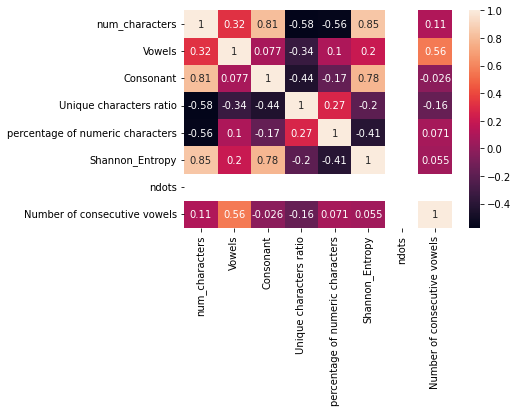

In [53]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [54]:
df1=df.drop(["isDGA"],axis=1)


In [55]:
df1.head(3)

,domain,host,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters,Shannon_Entropy,ndots,Number of consecutive vowels
88043,newhouse,newhouse.com.cn,15,5,8,0.875000,1.0,3.240224,0,1
109806,flocktory,flocktory.com,13,3,9,0.888889,1.0,3.180833,0,0
81425,check,check-domains.com,17,5,10,0.800000,1.0,3.572469,0,0


In [57]:
from sklearn.preprocessing import LabelEncoder


In [58]:
LabelEncoder=LabelEncoder()

In [59]:
df["isDGA"]=LabelEncoder.fit_transform(df["isDGA"])

In [60]:
df.head(3)

,isDGA,domain,host,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters,Shannon_Entropy,ndots,Number of consecutive vowels
88043,1,newhouse,newhouse.com.cn,15,5,8,0.875000,1.0,3.240224,0,1
109806,1,flocktory,flocktory.com,13,3,9,0.888889,1.0,3.180833,0,0
81425,1,check,check-domains.com,17,5,10,0.800000,1.0,3.572469,0,0


In [61]:
# import pymongo
# from pymongo import MongoClient


# client  = pymongo.MongoClient('<your_mongodb_cluster_id>')

    
# db = client['dbda']
# collection = db['']


# data = [row.asDict() for row in merged_data.collect()] # for pyspark df to dict

# collection.insert_many(data)

In [62]:
X=df1.drop(["host"],axis=1)
y=df["isDGA"]

In [63]:
X=X.drop(["domain"],axis=1)

In [64]:
X.head(4)

,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters,Shannon_Entropy,ndots,Number of consecutive vowels
88043,15,5,8,0.875000,1.0,3.240224,0,1
109806,13,3,9,0.888889,1.0,3.180833,0,0
81425,17,5,10,0.800000,1.0,3.572469,0,0
21022,17,7,9,0.642857,1.0,3.130718,0,2


In [ ]:
# y.to_csv("/content/drive/MyDrive/DGA_data/y.csv")

In [ ]:
# X.to_csv("/content/drive/MyDrive/DGA_data/y.csv")

In [ ]:
y.head(4)

# Train test split

In [65]:
from sklearn.model_selection import train_test_split



In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [68]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=25,max_depth=3,max_leaf_nodes=9,max_features=None, random_state=2)
#max_depth=3, max_features=None, max_leaf_nodes=9,n_estimators=25
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [69]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [70]:
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import confusion_matrix
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    confusion_matrix1 = confusion_matrix(y_test,y_pred)
    return accuracy,precision,confusion_matrix1

In [71]:
x = train_classifier(mnb,X_train,y_train,X_test,y_test)
print(x)

(0.8083125, 0.7704322956770432, array([[11858,  4174],
       [ 1960, 14008]]))


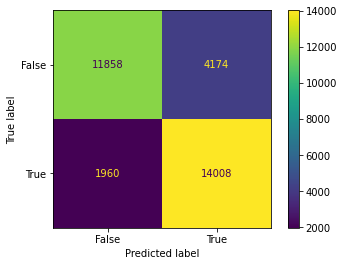

In [72]:
from sklearn import metrics
import matplotlib.pyplot as plt
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = x[2], display_labels = [False, True])

cm_display.plot()
plt.show()

In [73]:
accuracy_scores = []
precision_scores = []
Confusion_Matrix = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_Confusion_matrix = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Confusion_matrix",current_Confusion_matrix)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    Confusion_Matrix.append(current_Confusion_matrix)

For  SVC
Accuracy -  0.499
Precision -  0.499
Confusion_matrix [[    0 16032]
 [    0 15968]]
For  KN
Accuracy -  0.9
Precision -  0.892619926199262
Confusion_matrix [[14286  1746]
 [ 1454 14514]]
For  NB
Accuracy -  0.8083125
Precision -  0.7704322956770432
Confusion_matrix [[11858  4174]
 [ 1960 14008]]
For  DT
Accuracy -  0.8525625
Precision -  0.7922381546134664
Confusion_matrix [[12033  3999]
 [  719 15249]]
For  LR
Accuracy -  0.855625
Precision -  0.8304986020503262
Confusion_matrix [[13122  2910]
 [ 1710 14258]]
For  RF
Accuracy -  0.84884375
Precision -  0.7893724327977955
Confusion_matrix [[11981  4051]
 [  786 15182]]
For  AdaBoost
Accuracy -  0.87075
Precision -  0.8420839597548283
Confusion_matrix [[13301  2731]
 [ 1405 14563]]
For  BgC
Accuracy -  0.9108125
Precision -  0.8917433385111722
Confusion_matrix [[14220  1812]
 [ 1042 14926]]
For  ETC
Accuracy -  0.9114375
Precision -  0.8953166385745245
Confusion_matrix [[14293  1739]
 [ 1095 14873]]
For  GBDT
Accuracy -  0.873

In [74]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,"Confusion_matrix":Confusion_Matrix}).sort_values('Precision',ascending=False)


In [75]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [76]:
performance_df1.to_csv("/content/drive/MyDrive/DGA_data/Performance_of_algo.csv")


In [77]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.911438
1,KN,Accuracy,0.9
2,BgC,Accuracy,0.910813
3,xgb,Accuracy,0.910781
4,AdaBoost,Accuracy,0.87075
5,GBDT,Accuracy,0.873094
6,LR,Accuracy,0.855625
7,DT,Accuracy,0.852563
8,RF,Accuracy,0.848844
9,NB,Accuracy,0.808312


# Voting Classifier.

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[("svm",svc),("et",etc)])

In [ ]:
voting.fit(X_train,y_train)

In [ ]:
y_pred = voting.predict(y_test)

In [ ]:
print("Accuracy",accuracy_score(y_test))

In [ ]:
print("precision",precision_score(y_test,y_pred))

# Stacking Classifier.

In [100]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [101]:
estimators=[('SVC' ,svc),('KN' , knc),('NB', mnb), ('DT', dtc),('LR', lrc), ('RF', rfc), ('AdaBoost', abc), ('BgC', bc), ('ETC', etc),('GBDT',gbdt),('xgb',xgb)]

In [102]:
final_estimator = RandomForestClassifier()

In [103]:
from sklearn.ensemble import StackingClassifier

In [104]:
clf = StackingClassifier(estimators = estimators,final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
clf

In [ ]:
print("Accuracy",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))
print("Confusion_matrix",confusion_matrix(y_test,y_pred))
print(classification_report(y_pred, y_test))


# ROC_AUC CURVE

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")
plt.savefig('roc.pdf')

# Feature Selection.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(clf,n_features_to_select=4,direction = "Forward")
sfs.fit(X,y)
X_selection = sfs.transform(X)
print(X_selection)

In [ ]:
sfs = SequentialFeatureSelector(clf,n_features_to_select=4,direction = "Forward")


In [ ]:
sfs.fit(X,y)

In [ ]:
X_selection = sfs.transform(X)

In [ ]:
print(X_selection)

In [ ]:
x1 =X_train.head(1)

In [ ]:
x1

In [ ]:
loaded_model.predict(x1)

In [ ]:
X_train

In [ ]:
import joblib
loaded_model = joblib.load("/content/drive/MyDrive/DGA_data/STacking_DGA.sav")

# Hyper-parameter tuning


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,\
RandomizedSearchCV
from sklearn.metrics import classification_report


In [82]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

# predict the mode
y_pred = model.predict(X_test)

# performance evaluatio metrics
print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

           0       0.89      0.93      0.91     15216
           1       0.94      0.89      0.91     16784

    accuracy                           0.91     32000
   macro avg       0.91      0.91      0.91     32000
weighted avg       0.91      0.91      0.91     32000



In [95]:
print("Confusion_matrix",confusion_matrix(y_pred,y_test))

Confusion_matrix [[14226   990]
 [ 1806 14978]]


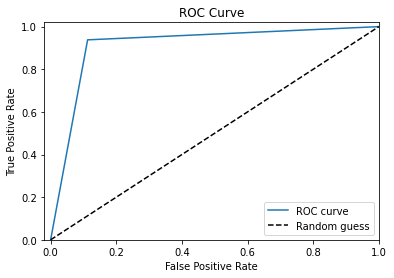

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")
plt.savefig('roc.pdf')

In [86]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [87]:
grid_search = GridSearchCV(RandomForestClassifier(),
						param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)


RandomForestClassifier(max_depth=6, max_leaf_nodes=9, n_estimators=150)


In [88]:
grid_search

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [97]:
#GridSearchCV
model_random = RandomForestClassifier(max_depth=6,
									max_features='log2',
									max_leaf_nodes=9,
									n_estimators=150)
model_random.fit(X_train, y_train)
y_pred_rand = model.predict(X_test)
print(classification_report(y_pred_rand, y_test))
print("Confusion_matrix",confusion_matrix(y_pred_rand,y_test))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     15216
           1       0.94      0.89      0.91     16784

    accuracy                           0.91     32000
   macro avg       0.91      0.91      0.91     32000
weighted avg       0.91      0.91      0.91     32000

Confusion_matrix [[14226   990]
 [ 1806 14978]]


In [89]:
random_search = RandomizedSearchCV(RandomForestClassifier(),
								param_grid)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)


RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9)


In [98]:
model_random = RandomForestClassifier(max_depth=9,
									max_features='log2',
									max_leaf_nodes=9,
									n_estimators=100)
model_random.fit(X_train, y_train)
y_pred_rand = model.predict(X_test)
print(classification_report(y_pred_rand, y_test))
print("Confusion_matrix",confusion_matrix(y_pred_rand,y_test))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     15216
           1       0.94      0.89      0.91     16784

    accuracy                           0.91     32000
   macro avg       0.91      0.91      0.91     32000
weighted avg       0.91      0.91      0.91     32000

Confusion_matrix [[14226   990]
 [ 1806 14978]]


In [91]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
print("Accuracy",(accuracy_score(y_pred_rand,y_test))*100)
print("precision",precision_score(y_pred_rand,y_test))
print("Confusion_matrix",confusion_matrix(y_pred_rand,y_test))

Accuracy 91.2625
precision 0.938001002004008
Confusion_matrix [[14226   990]
 [ 1806 14978]]


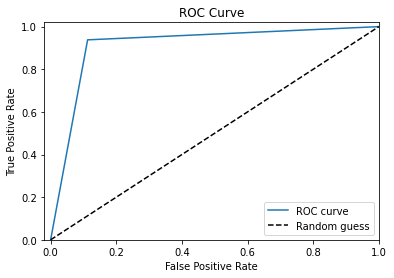

In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rand)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")
plt.savefig('roc.pdf')

In [ ]:
ac=accuracy_score(y_pred_rand,y_pred)
ps=precision_score(y_pred_rand,y_pred)
cm=confusion_matrix(y_pred_rand,y_pred)

In [ ]:
performance_RF_HT = (pd.DataFrame([('Algorithm',"Random_Forest"),('Accuracy',ac),('Precision',ps),("Confusion_matrix",cm)])).reset_index()


In [ ]:
performance_RF_HT.to_csv("/content/drive/MyDrive/DGA_data/performance_RF_HT.csv")

In [ ]:
import joblib
joblib.dump(model_random, '/content/drive/MyDrive/DGA_data/Random_forest_Hyperparameter.sav')

In [ ]:
 model1 = joblib.load('/content/drive/MyDrive/DGA_data/Random_forest_Hyperparameter.sav')

In [ ]:
model1.predict(X_test.head(1))

In [ ]:
model1.predict([[30	,4	,16	,0.807692	,0.653846,	4.440224	,0	,0]])

In [ ]:
X_test.head(1)

In [ ]:
df.head(1)

In [ ]:
l


In [ ]:
model1.predict([l])